In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
# URL страницы
url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"

# Чтение всех таблиц со страницы
tables = pd.read_html(url)
table= tables[12]
table_numeric = table.select_dtypes(include='number') / 10
table[table_numeric.columns] = table_numeric
table


,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,—,—
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,109,76
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,141,101
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,111,71
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,82,—
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,120,79
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,146,104
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,106,68
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,122,88
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,121,80


In [65]:
num_rows, num_cols = table.shape
print(f"\nКоличество строк: {num_rows}")
print(f"Количество столбцов: {num_cols}")


Количество строк: 28
Количество столбцов: 9


In [66]:
table.replace("—", np.nan, inplace=True)


In [67]:
column_types = table.dtypes
print(column_types)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object


In [68]:
regions = table['Регіон']
for column in table.columns:
        table[column] = pd.to_numeric(table[column], errors='coerce')
table['Регіон'] = regions
column_types = table.dtypes
print(column_types)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object


In [69]:
missing_counts = table.isnull().sum()
missing = (missing_counts / len(table)) * 100

print(missing)

Регіон     0.000000
1950       7.142857
1960       3.571429
1970       3.571429
1990       0.000000
2000       0.000000
2012       0.000000
2014       7.142857
2019      14.285714
dtype: float64


In [70]:
df = table.drop(table.index[-1])
df

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,109.0,76.0
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,141.0,101.0
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,111.0,71.0
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,82.0,NaN
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,120.0,79.0
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,146.0,104.0
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,106.0,68.0
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,122.0,88.0
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,121.0,80.0


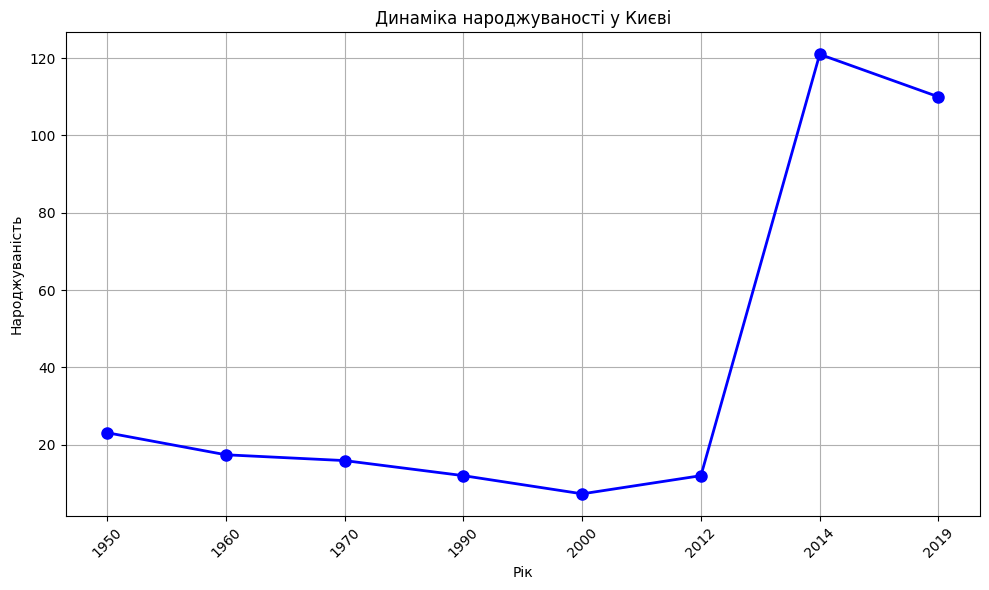

In [71]:
columns_to_fill = df.columns[df.columns != 'Регіон']

df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].mean())
df

kyiv_data = df[df['Регіон'] == 'Київ'].squeeze()

# Визначення років для відображення на графіку
years = kyiv_data.index[1:]

# Визначення значень для лінійного графіка
values = kyiv_data.values[1:]

# Побудова графіка
plt.figure(figsize=(10, 6))
plt.plot(years, values, marker='o', linestyle='-', color='b', linewidth=2, markersize=8)

# Налаштування заголовка та підписів осей
plt.title('Динаміка народжуваності у Києві')
plt.xlabel('Рік')
plt.ylabel('Народжуваність')
plt.grid(True)
plt.xticks(years, rotation=45)
plt.tight_layout()

# Показати графік
plt.show()


Волинська
Закарпатська
Івано-Франківська
Львівська
Одеська
Рівненська
Херсонська
Чернівецька
Київ


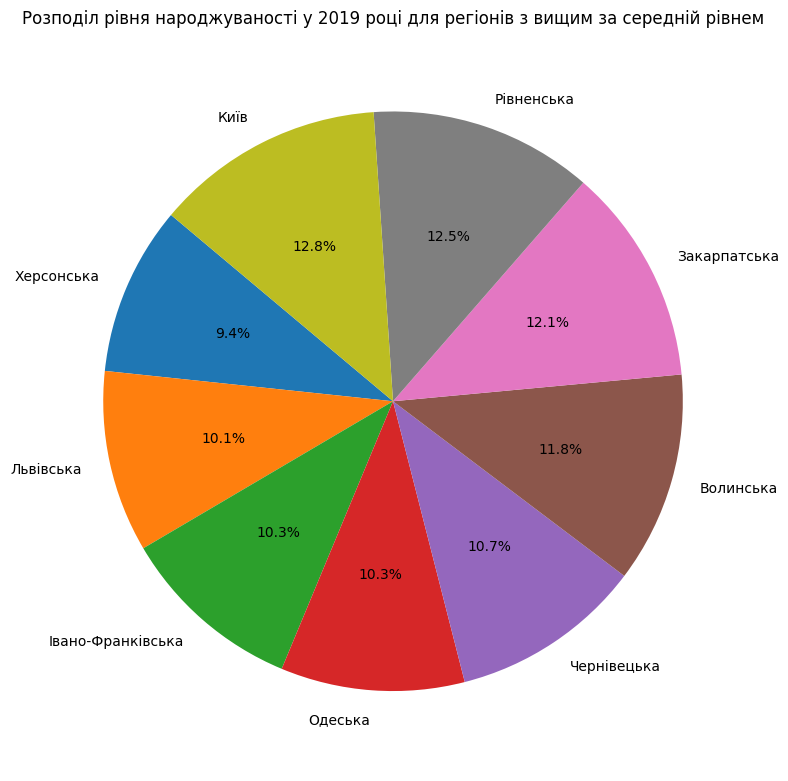

In [72]:
rate_2019 = df['2019'].mean()
regions_above_average = df[df['2019'] > rate_2019]['Регіон'].tolist()
for region in regions_above_average:
    print(region)

# Відбір регіонів, де рівень народжуваності у 2019 році вищий за середній
regions_above_average = df[df['2019'] > rate_2019]

regions_above_average = regions_above_average.sort_values(by='2019')

# Побудова кругової діаграми
plt.figure(figsize=(8, 8))
plt.pie(regions_above_average['2019'], labels=regions_above_average['Регіон'], autopct='%1.1f%%', startangle=140)
plt.title('Розподіл рівня народжуваності у 2019 році для регіонів з вищим за середній рівнем')
plt.axis('equal')  # Забезпечує круглу форму діаграми
plt.tight_layout()
plt.show()

In [73]:
region_highest= df.loc[df['2014'].idxmax(), 'Регіон']
print(region_highest)

Рівненська


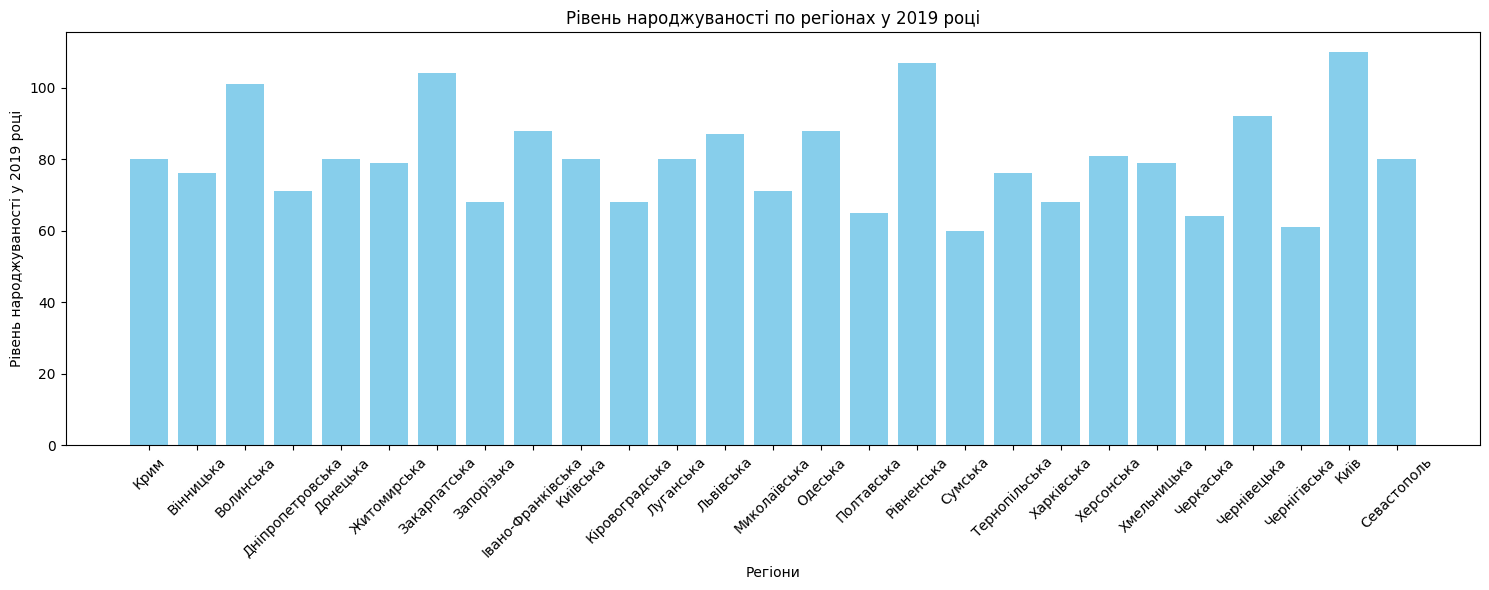

In [74]:
regions = df['Регіон']
birth_rates_2019 = df['2019']

plt.figure(figsize=(15, 6))
plt.bar(regions, birth_rates_2019, color='skyblue')
plt.xlabel('Регіони')
plt.ylabel('Рівень народжуваності у 2019 році')
plt.title('Рівень народжуваності по регіонах у 2019 році')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()